<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
dane = pd.read_csv("/tested[1].csv")
dane = dane.drop(columns=[ "PassengerId",'Name', "Ticket", "Cabin", 'Embarked'])
dane = dane.dropna()
dane = pd.get_dummies(dane, columns=['Sex'], dtype=float)
dane = pd.DataFrame(dane)

dane.head()

dane2 = pd.read_csv("/ex2data1[1].csv")
dane2.head()

dane3 = pd.read_csv("/Raisin_Dataset[1].csv")
dane3.replace(to_replace='Kecimen', value=0, inplace=True)
dane3.replace(to_replace='Besni', value=1, inplace=True)
dane3

<ipython-input-113-f7723f7bd169>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dane3.replace(to_replace='Besni', value=1, inplace=True)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
X = dane.iloc[:, :-1]
y = dane.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)
print(X_test)

X2 = dane2.iloc[:, :-1]
y2= dane2.iloc[:, -1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_train, y2_train, test_size=0.25)

X3 = dane3.iloc[:, :-1]
y3= dane3.iloc[:, -1]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25)
X3_train, X3_valid, y3_train, y3_valid = train_test_split(X3_train, y3_train, test_size=0.25)

     Survived  Pclass   Age  SibSp  Parch      Fare  Sex_female
135         0       3  24.0      0      0    7.8542         0.0
217         0       1  57.0      1      1  164.8667         0.0
239         1       1  48.0      1      0  106.4250         1.0
395         1       1  18.0      1      0   60.0000         1.0
68          0       1  31.0      0      0   28.5375         0.0
..        ...     ...   ...    ...    ...       ...         ...
392         0       3  13.0      0      2   20.2500         0.0
105         0       3  28.0      0      0   22.5250         0.0
153         1       3  36.0      0      2   12.1833         1.0
318         0       3  27.0      0      0    7.8542         0.0
291         1       3  30.0      0      0    6.9500         1.0

[83 rows x 7 columns]


In [115]:
test_set = pd.DataFrame(X_test, y_test)
train_set = pd.DataFrame(X_train, y_train)
valid_set = pd.DataFrame(X_valid, y_valid)
log_r = LogisticRegression(max_iter=2000)
log_r.fit(X_train, y_train)

log_r2 = LogisticRegression(max_iter=2000)
log_r2.fit(X2_train, y2_train)

log_r3 = LogisticRegression(max_iter=2000)
log_r3.fit(X3_train, y3_train)

LogisticRegression(max_iter=2000)

'\nplt.plot(fp_rate, tp_rate)\n\nplt.title("Krzywa ROC dla najlepszego modelu")\nplt.show()'

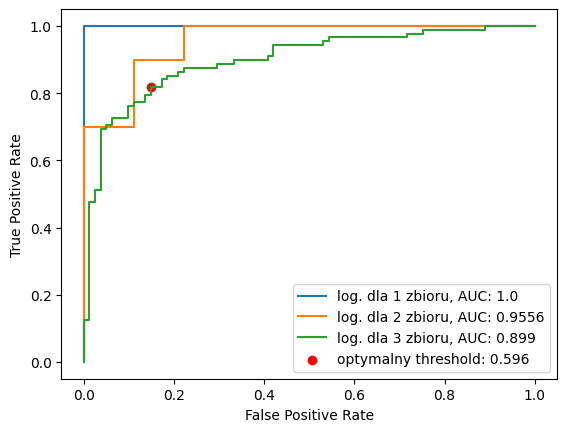

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
predicted_classes_logistic = log_r.predict(X_valid)
pred1 = log_r.predict_proba(X_valid)
pred2 = log_r2.predict_proba(X2_valid)
pred3 = log_r3.predict_proba(X3_valid)

fpr, tpr, thresholds = roc_curve(y_valid, pred1[:,1], pos_label=1)
plt.plot(fpr,tpr,label="log. dla 1 zbioru, AUC: "+str(round(roc_auc_score(y_valid, pred1[:,1]), 4)))

fpr, tpr, thresholds = roc_curve(y2_valid, pred2[:,1], pos_label=1)
plt.plot(fpr,tpr,label="log. dla 2 zbioru, AUC: "+str(round(roc_auc_score(y2_valid, pred2[:,1]), 4)))

fpr, tpr, thresholds = roc_curve(y3_valid, pred3[:,1], pos_label=1)
plt.plot(fpr,tpr,label="log. dla 3 zbioru, AUC: "+str(round(roc_auc_score(y3_valid, pred3[:,1]), 4)))

optimal_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_index]


plt.scatter(fpr[optimal_index], tpr[optimal_index], marker='o', color='red', label= f"optymalny threshold: {round(optimal_threshold, 3)}")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
'''
plt.plot(fp_rate, tp_rate)

plt.title("Krzywa ROC dla najlepszego modelu")
plt.show()'''

In [137]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
pred_test= log_r3.predict_proba(X3_test)[:,1]
pred_test = pred_test > optimal_threshold
tp, fn, fp, tn = confusion_matrix(y3_test, pred_test).ravel()

print("accuracy: %0.3f" % (accuracy_score(y3_test, pred_test)))
print("recall: %0.3f" % (recall_score(y3_test, pred_test)))
print("precision: %0.3f" % (precision_score(y3_test, pred_test)))
print("f1 score: %0.3f" % (f1_score(y3_test, pred_test)))
print("specificity: %0.3f" % (tn/(tn+fp)))
print("sensitivity: %0.3f" % (tp/(tp+fn)))


accuracy: 0.867
recall: 0.817
precision: 0.913
f1 score: 0.862
specificity: 0.817
sensitivity: 0.918
